In [2]:
from sympy import *
from IPython.display import display

# **#1**

In [3]:
t1, t2, t3, t4 = symbols('t1 t2 t3 t4')
A = Matrix(([2, -1, 3, -5, 1], [1, -1, -5, 0, 2], [3, -2, -2, -5, 3]))
res = linsolve(A, (t1,t2,t3,t4))
display(res)

FiniteSet((-8*t3 + 5*t4 - 1, -13*t3 + 5*t4 - 3, t3, t4))

In [4]:
norm = sum([el**2 for i in res for el in i]).simplify()
norm

234*t3**2 - 210*t3*t4 + 94*t3 + 51*t4**2 - 40*t4 + 10

In [5]:
newt3 = solve(norm-1)[1][t3]
newt3

35*t4/78 + sqrt(-909*t4**2 - 510*t4 + 103)/234 - 47/234

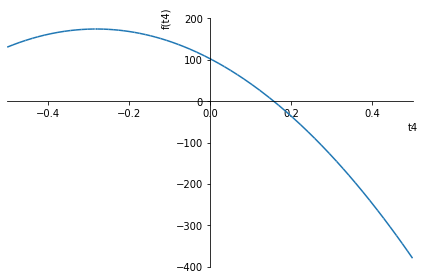

In [23]:
plot(-909*t4**2-510*t4+103, (t4, -0.5, 0.5))

In [6]:
res = res.subs({t3: newt3})
res #vector-result with norm 1

FiniteSet((55*t4/39 - 4*sqrt(-909*t4**2 - 510*t4 + 103)/117 + 71/117, -5*t4/6 - sqrt(-909*t4**2 - 510*t4 + 103)/18 - 7/18, 35*t4/78 + sqrt(-909*t4**2 - 510*t4 + 103)/234 - 47/234, t4))

In [7]:
res1 = Matrix(list(list(res)[0]))
A1 = Matrix(([2, -1, 3, -5], [1, -1, -5, 0], [3, -2, -2, -5]))
b = Matrix([1,2,3])
A1*res1 - b #check if res is indeed sovling a system

Matrix([
[0],
[0],
[0]])

# **#2**

In [8]:
x = symbols('x')
for res in solve(x**8 - x**3 + x - 2, x):
    display(res.evalf())

-1.07809905617364

1.10658778548484

-0.851902335636978 - 0.830679280744092*I

-0.851902335636978 + 0.830679280744092*I

0.682041348512646 - 0.672855966094023*I

0.682041348512646 + 0.672855966094023*I

0.155616622468731 - 1.12507260037776*I

0.155616622468731 + 1.12507260037776*I

# **#3**

In [9]:
poly = 6*x**5 + 37*x**4 - 52*x**3 - 104*x**2 + 102*x - 21
for res in solve(poly):
    if res.is_Rational:
        display(res)

-7

1/3

1/2

# **#4**

In [10]:
x, y = symbols('x y')
nonlinsolve([y**2 - x*y +12, x**2 - x*y - 28], (x, y))

FiniteSet((-7, -3), (7, 3))

# **#5**

In [11]:
for res in solve(x**2*sin(x) + sin(x) + x**2*cos(x) + cos(x)):
    if not res.find(I):
        display(res)

-pi/4

3*pi/4

# **#6**

In [12]:
f = Function('f')
n = Symbol('n', integer=True)
y = Function('y')
f = y(n+1) + 4*y(n) + 5*y(n-1) + n**2
res = simplify(rsolve(f, y(n), {y(0): 0, y(1): -2}))
display(res)
display(res.subs({n: 20}).simplify())
display(res.subs({n: 50}).simplify())


2*(6 - I)*(-n**2 - 2*n + (-2 - I)**n - 1)/37

-112890768/37 + 37031264*I/37

-1878691815054805888/37 - 3100896269727192516*I/37

# **#7**

In [13]:
solve(2*(x-3)*(1-2*x)>6)

(3/2 < x) & (x < 2)

# **#8**

In [14]:
(solve([(x+3)*(x-3)*(x-15)<0, abs(x+6)-abs(x-3)>3]))

(0 < x) & (x < oo) & (((-oo < x) & (x < -3)) | ((3 < x) & (x < 15)))

# **#9**

In [15]:
x = symbols('x')
y = Function('y')(x)
y_ = diff(y)
for eq in dsolve(x*y*y_ - y**2 + 2*x**2):
    display(eq)

Eq(y(x), -x*sqrt(C1 - 4*log(x)))

Eq(y(x), x*sqrt(C1 - 4*log(x)))

# **#10**

In [16]:
x = Symbol('x')
y = Function('y')(x)
eq = y/x + (y**2 -log(x))*y.diff()
display(eq)
for r, i in zip(dsolve(eq), range(1,3)):
    display(r)

(y(x)**2 - log(x))*Derivative(y(x), x) + y(x)/x

Eq(y(x), C1/2 - sqrt(C1**2 - 4*log(x))/2)

Eq(y(x), C1/2 + sqrt(C1**2 - 4*log(x))/2)

# **#11**

In [17]:
x, y, z = symbols('x y z', cls=Function)
t = symbols('t')
for eq in dsolve([x(t).diff() - 2*x(t) + z(t) + y(t), y(t).diff() - 3*x(t) + 2*y(t) + 3*z(t), z(t).diff() - 2*z(t) + x(t) - y(t)]):
    display(eq.simplify())

Eq(x(t), -C1 + C2*exp(t) + C3*t*exp(t) + C3*exp(t))

Eq(y(t), -3*C1 + C2*exp(t) + C3*t*exp(t))

Eq(z(t), C1 + C3*exp(t))

# **#12**

In [19]:
x=symbols('x')
y=Function('y')(x)
eq = y.diff(x, x) + 3*y.diff(x) - 9*exp(3*x)/(1+exp(3*x))
eq

3*Derivative(y(x), x) + Derivative(y(x), (x, 2)) - 9*exp(3*x)/(exp(3*x) + 1)

In [36]:
res = dsolve(eq, ics = {y.subs(x, 0): log(4), y.diff(x).subs(x, 0): 3*(1-log(2))})
res

Eq(y(x), log(exp(3*x) + 1) + exp(-3*x)*log(exp(3*x) + 1))

# **#13**

# **#14**

# **#15**